## Algorithm training, testing, validation, and experiment tracking

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (16, 12)

### Model training and testing

In [2]:
# import libraries for algorithms traininng, and metrics to judge performance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# load clean dataset
data_load_path = '../data/clean/'

# training data
train_df = pd.read_csv(data_load_path + 'train.csv')
X_train = train_df.drop(['Daily_radiation'], axis = 1)
y_train = train_df['Daily_radiation']

# test data
test_df = pd.read_csv(data_load_path + 'test.csv')
X_test = test_df.drop(['Daily_radiation'], axis = 1)
y_test = test_df['Daily_radiation']

### Linear Regression

In [4]:
# Setup the pipeline steps for linear regression
steps = [
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
]

# Create the pipeline
pipeline_lr = Pipeline(steps)

# Fit the pipeline to the train set
pipeline_lr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_lr = pipeline_lr.predict(X_test)

In [5]:
# Evaluating algorithm performance
mse = mean_squared_error(y_test, y_pred_lr, squared = False)
print('r2_score: ', r2_score(y_test, y_pred_lr))
print('Mean Squared Error: %.2f' % (mse))

r2_score:  0.9397860807754174
Mean Squared Error: 31.13


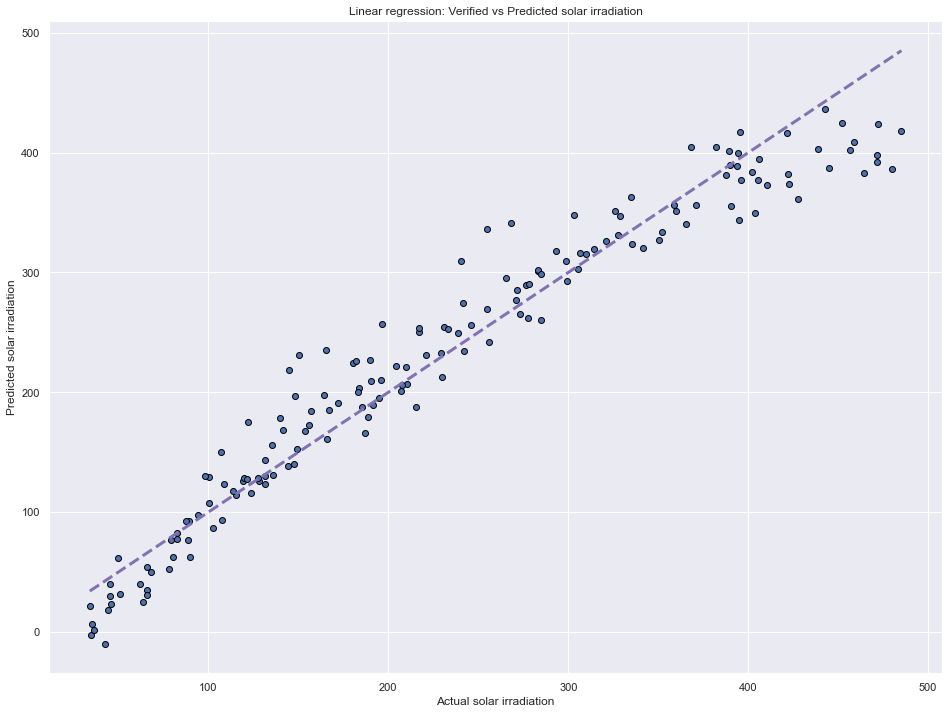

In [6]:
#Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_lr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title('Linear regression: Verified vs Predicted solar irradiation')
plt.savefig('notebooks_figures/lr_line_of_fit.jpg')
plt.show()

c:\users\rag\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


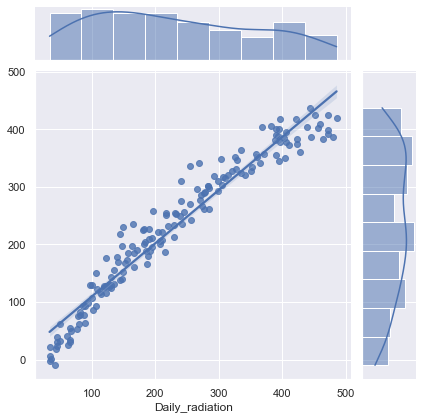

In [7]:
sns.jointplot(y_test, y_pred_lr, kind = 'reg')
plt.savefig('notebooks_figures/lr_jointplot.jpg')
plt.show()

### Random Forest Regressor

In [8]:
# Setup the random forest model: rft
rfr = RandomForestRegressor()

# Fit the pipeline to the train set
rfr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_rfr = rfr.predict(X_test)

In [9]:
# Evaluating algorithm performance
mse_rf = mean_squared_error(y_test, y_pred_rfr, squared = False)
print('r2_score: ', r2_score(y_test, y_pred_rfr))
print('Mean Squared Error: %.2f' % (mse_rf))

r2_score:  0.9660634079072438
Mean Squared Error: 23.37


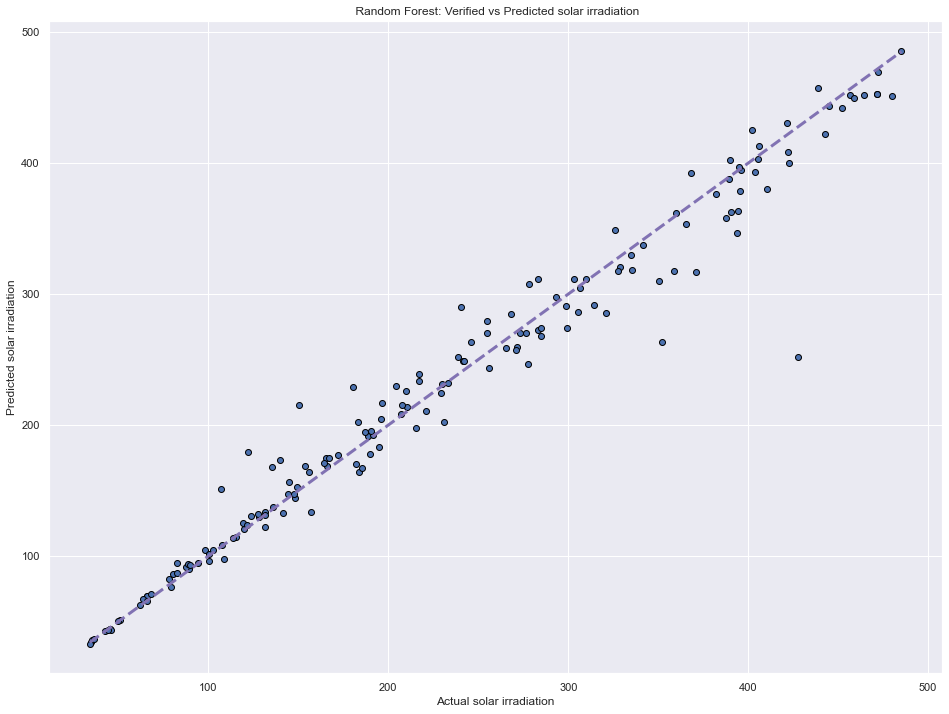

In [10]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_rfr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(' Random Forest: Verified vs Predicted solar irradiation')
plt.savefig('notebooks_figures/rfr_line_of_fit.jpg')
plt.show()

c:\users\rag\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


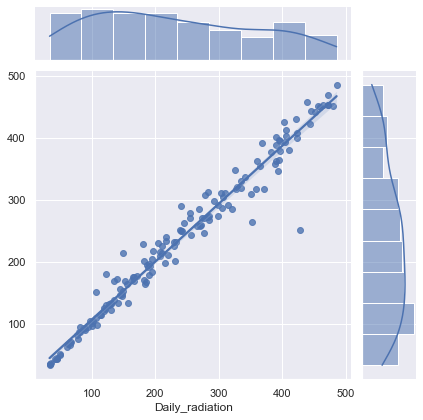

In [11]:
sns.jointplot(y_test, y_pred_rfr, kind = 'reg')
plt.savefig('notebooks_figures/rfr_jointplot.jpg')
plt.show()

### GradientBoosting Regressor

In [12]:
# Setup the gradient boosting model: gbr
gbr = GradientBoostingRegressor()

# Fit the pipeline to the train set
gbr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_gbr = gbr.predict(X_test)

In [13]:
# Evaluating algorithm performance
mse_gr = mean_squared_error(y_test, y_pred_gbr, squared = False)
print('r2_score: ', r2_score(y_test, y_pred_gbr))
print('Mean Squared Error: %.2f' % (mse_gr))

r2_score:  0.9688841496911526
Mean Squared Error: 22.38


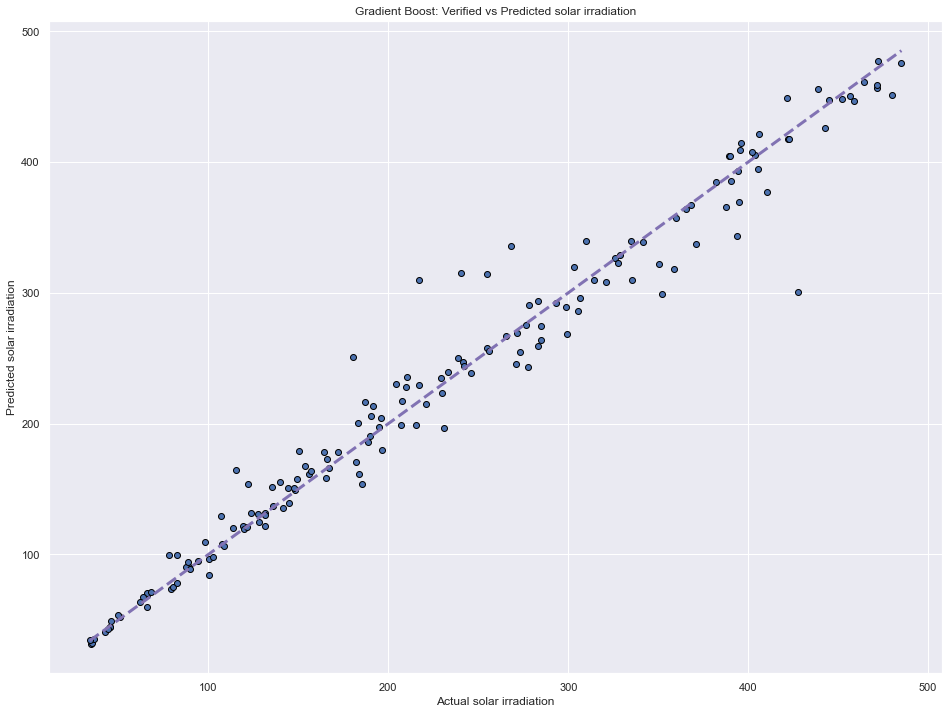

In [14]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_gbr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title('Gradient Boost: Verified vs Predicted solar irradiation')
plt.savefig('notebooks_figures/gbr_line_of_fit.jpg')
plt.show()

c:\users\rag\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


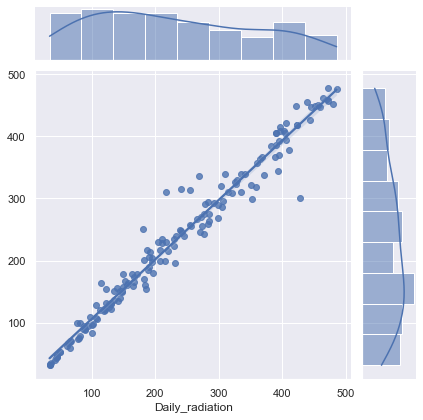

In [15]:
sns.jointplot(y_test, y_pred_gbr, kind = 'reg')
plt.savefig('notebooks_figures/gbr_jointplot.jpg')
plt.show()

### Model Validation

In [16]:
# validation data
val_df = pd.read_csv(data_load_path + 'val.csv')
X_val = val_df.drop(['Daily_radiation'], axis=1)
y_val = val_df['Daily_radiation']

In [17]:
# validate models
y_val_lr = pipeline_lr.predict(X_val)
y_val_rfr = rfr.predict(X_val)
y_val_gbr = gbr.predict(X_val)

In [18]:
# Evaluating algorithm performance for linear regression
mse_lr_val = mean_squared_error(y_val, y_val_lr, squared = False)
print('r2_score: ', r2_score(y_val, y_val_lr))
print('Linear Regression - Mean Squared Error: %.2f' % (mse_lr_val))

r2_score:  0.936519244622433
Linear Regression - Mean Squared Error: 31.14


In [19]:
# Evaluating algorithm performance for random forest regression
mse_rf_val = mean_squared_error(y_val, y_val_rfr, squared = False)
print('r2_score: ', r2_score(y_val, y_val_rfr))
print('Random Forest - Mean Squared Error: %.2f' % (mse_rf_val))

r2_score:  0.9822649553147221
Random Forest - Mean Squared Error: 16.46


In [20]:
# Evaluating algorithm performance for gradient boost regression
mse_gbr_val = mean_squared_error(y_val, y_val_gbr, squared = False)
print('r2_score: ', r2_score(y_val, y_val_gbr))
print('Gradient Boost - Mean Squared Error: %.2f' % (mse_gbr_val))

r2_score:  0.977251828100874
Gradient Boost - Mean Squared Error: 18.64


In [21]:
## Export model and hook it with api

## Experiment tracking with neptune

In [23]:
# import neptune libraries and sklearn integration
import neptune.new as neptune
import neptune.new.integrations.sklearn as npt_utils

In [24]:
nept_project="maximilien-vicari/solarcast"
nept_api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI5NTNmZjYyZS00NjFjLTQyYWQtOTFiNy02ZmVjZWEzOGFmNWQifQ=="

run = neptune.init(api_token=nept_api_token,
                   project=nept_project,
                   name='solar-irradiation',
                   source_files=["model_dev_sr.ipynb"])

https://app.neptune.ai/maximilien-vicari/solarcast/e/SOL-5
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [25]:
# Track files, models, and folders
# File
path_to_raw_data = '../data/raw/'
run["raw_datasets"].track_files(path_to_raw_data)

path_to_clean_data = '../data/clean/'
run["cleaned_datasets"].track_files(path_to_clean_data)

# Folder
path_to_notebooks = '../notebooks/'
run["notebooks"].track_files(path_to_notebooks)

Did not log feature importance chart. Error: could not find feature importances param on Pipeline


c:\users\rag\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\users\rag\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\users\rag\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\users\rag\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\users\rag\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but Rando

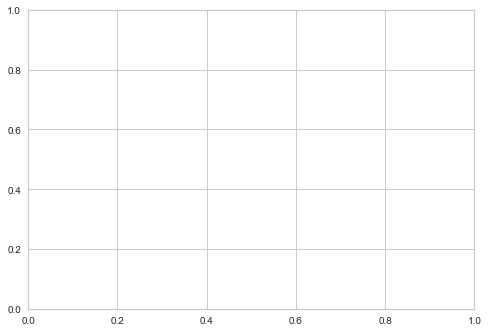

In [26]:
# train, and test; while tracking the experiment
run['lr_summary'] = npt_utils.create_regressor_summary(pipeline_lr, X_train, X_test, y_train, y_test)
run['gbr_summary'] = npt_utils.create_regressor_summary(gbr, X_train, X_test, y_train, y_test)
run['rfr_summary'] = npt_utils.create_regressor_summary(rfr, X_train, X_test, y_train, y_test)

In [27]:
# stop experiment
run.stop()

Shutting down background jobs, please wait a moment...
Done!


Waiting for the remaining 1 operations to synchronize with Neptune. Do not kill this process.


All 1 operations synced, thanks for waiting!


## Experiment tracking with mlflow

In [28]:
# import libraries
import mlflow
import mlflow.sklearn

In [29]:
# model metrics for linear regression
mse_lr_pred = mean_squared_error(y_test, y_pred_lr, squared = False)
R2_score_lr = r2_score(y_test, y_pred_lr)

# model metrics for random forest
mse_rfr_pred = mean_squared_error(y_test, y_pred_rfr, squared = False)
R2_score_rfr = r2_score(y_test, y_pred_rfr)

# model metrics for gradient boost
mse_gbr_pred = mean_squared_error(y_test, y_pred_gbr, squared = False)
R2_score_gbr = r2_score(y_test, y_pred_gbr)

#### manually log experiment

In [30]:
# set the tracking uri
mlflow.set_tracking_uri("http://127.0.0.1:5000/")
experiment = mlflow.get_experiment('0')

In [31]:
print("Name of experiment: {}".format(experiment.name))
print("Location of Artifact: {}".format(experiment.artifact_location))
print("Life cycle phase: {}".format(experiment.lifecycle_stage))
print("Experiment_ID: {}".format(experiment.experiment_id))

Name of experiment: Default
Location of Artifact: ./artifacts/0
Life cycle phase: active
Experiment_ID: 0


In [32]:
# start experiment tracking
run = mlflow.start_run(run_name = 'solar_irradiation')
run_id = run.info.run_id

In [33]:
# Log mlflow attributes for mlflow UI
# log metrics for linear regression
mlflow.log_metric("rmse_lr", mse_lr_pred)
mlflow.log_metric("r2_score_lr", R2_score_lr)

# log metrics for random forest
mlflow.log_metric("rmse_rfr", mse_rfr_pred)
mlflow.log_metric("r2_score_rfr", R2_score_rfr)

# log metrics for gradientboost
mlflow.log_metric("rmse_gbr", mse_gbr_pred)
mlflow.log_metric("r2_score_gbr", R2_score_gbr)

In [34]:
# log models experiments
artifact_path = "default"
mlflow.sklearn.log_model(pipeline_lr, artifact_path = artifact_path, registered_model_name = "linear-regression-model")
mlflow.sklearn.log_model(rfr, artifact_path = artifact_path, registered_model_name = "sklearn-random-forest-model")
mlflow.sklearn.log_model(gbr, artifact_path = artifact_path, registered_model_name = "sklearn-gradientboost-model")

Successfully registered model 'linear-regression-model'.
2022/01/02 12:53:10 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: linear-regression-model, version 1
Created version '1' of model 'linear-regression-model'.
Successfully registered model 'sklearn-random-forest-model'.
2022/01/02 12:53:14 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: sklearn-random-forest-model, version 1
Created version '1' of model 'sklearn-random-forest-model'.
Successfully registered model 'sklearn-gradientboost-model'.
2022/01/02 12:53:18 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: sklearn-gradientboost-model, version 1
Created version '1' of model 'sklearn-gradientboost-model'.


In [37]:
# Log artifacts (output files)
mlflow.log_artifact("notebooks_figures/lr_line_of_fit.jpg", artifact_path = 'features')

# Log Features
mlflow.log_artifact('../data/clean/train.csv', artifact_path = 'features')

In [38]:
# End tracking
mlflow.end_run()

#### Auto log experiment

In [39]:
# enable auto logging
mlflow.sklearn.autolog(log_models = True)

2022/01/02 12:57:20 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\users\rag\appdata\local\programs\python\python39\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first."


In [42]:
with mlflow.start_run(experiment_id = experiment.experiment_id, run_name = 'auto_lr_model') as run:
    pipeline_lr.fit(X_train,
                      y_train)
    y_pred_lr = pipeline_lr.predict(X_test)
    rfr.fit(X_train,
            y_train)
    y_pred_rfr = rfr.predict(X_test)
    gbr.fit(X_train,
            y_train)
    y_pred_gbr = gbr.predict(X_test)

2022/01/02 12:58:46 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\users\rag\appdata\local\programs\python\python39\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2022/01/02 12:58:51 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\users\rag\appdata\lo

In [43]:
# End tracking
mlflow.end_run()

### Export models

In [ ]:
# check sklearn version
from sklearn import __version__

print(__version__)

In [ ]:
# loading libraries
import joblib

# Save Models to file in the model directory
# save linear regression model
joblib_lr = "../ml_models/model_lr.pkl"  
joblib.dump(pipeline_lr, joblib_lr)
# save random forest model
joblib_rfr = "../ml_models/model_rfr.pkl" 
joblib.dump(rfr, joblib_rfr)
# save gradientboost model
joblib_gbr = "../ml_models/model_gbr.pkl"  
joblib.dump(gbr, joblib_gbr)